Сделаем классификацию с помощью ResNet50, EfficientNetB0, MobileNetV2 и VGG16.
Они принимают картинку (224x224) и предсказывают к какому классу она относится. У нас 7 классов кожных заболеваний.
Оставим все 7, НО:

в группу риска отнесём:
*   Меланома (mel) — самая опасная, требует срочной диагностики.
*   Базально-клеточная карцинома (bcc) — редко метастазирует, но локально разрушает ткани.
*   Актинический кератоз (akiec)— требует наблюдения, так как может прогрессировать в рак.

Все остальные доброкачественные.



In [1]:
!ls

drive  sample_data


Загружать датасет с сайта кагл напрямую не получилось(как раньше). Что-то там сломалось и не работает.
Пришлось скачать датасет на ноутбук, сжать в зип архив. Потом загрузить его на свой гугл диск(т.к больше 2 гб весит и на колаб просто так не загрузится). И потом уже подключаться к гугл диску, распаковывать зип архив.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

zip_path = "/content/drive/My Drive/Курсовая работа/archive.zip"
extract_path = "/content/HAM10000"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path) # чекнем содержимое



['archive', '__MACOSX']

In [4]:
import os
os.listdir("/content/HAM10000/archive")


['hmnist_28_28_L.csv',
 'HAM10000_metadata.csv',
 'hmnist_8_8_RGB.csv',
 'HAM10000_images_part_2',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_1']

In [5]:
img_folder_1 = "/content/HAM10000/archive/HAM10000_images_part_1"
img_folder_2 = "/content/HAM10000/archive/HAM10000_images_part_2"

print("Images in part 1:", len(os.listdir(img_folder_1)))
print("Images in part 2:", len(os.listdir(img_folder_2)))


Images in part 1: 5000
Images in part 2: 5015


Аллилуя! Все папки нужные есть и таблица сразу есть, где изображения подписаны.

Теперь попробуем MobileNetV2 и VGG16

Общее количество изображений: 10015
Файлы распределены по классам.
Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
ResNet модель уже обучена. Загружаем из файла...


EfficientNet модель уже обучена. Загружаем из файла...


Training ResNet model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 227s 859ms/step - accuracy: 0.6408 - loss: 1.2462 - val_accuracy: 0.6695 - val_loss: 1.1130
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 186s 742ms/step - accuracy: 0.6653 - loss: 1.1382 - val_accuracy: 0.6700 - val_loss: 1.0940
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 180s 719ms/step - accuracy: 0.6676 - loss: 1.1093 - val_accuracy: 0.6745 - val_loss: 1.1292
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 180s 716ms/step - accuracy: 0.6686 - loss: 1.1086 - val_accuracy: 0.6715 - val_loss: 1.0828
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 175s 698ms/step - accuracy: 0.6646 - loss: 1.1094 - val_accuracy: 0.6700 - val_loss: 1.1521


Training EfficientNet-B0 model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 223s 790ms/step - accuracy: 0.6523 - loss: 1.2353 - val_accuracy: 0.6705 - val_loss: 1.1321
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 169s 675ms/step - accuracy: 0.6676 - loss: 1.1570 - val_accuracy: 0.6705 - val_loss: 1.1302
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 170s 679ms/step - accuracy: 0.6663 - loss: 1.1575 - val_accuracy: 0.6705 - val_loss: 1.1865
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 169s 675ms/step - accuracy: 0.6655 - loss: 1.1486 - val_accuracy: 0.6705 - val_loss: 1.1411
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 181s 720ms/step - accuracy: 0.6725 - loss: 1.1332 - val_accuracy: 0.6705 - val_loss: 1.1360


Training MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 190s 722ms/step - accuracy: 0.6734 - loss: 1.0641 - val_accuracy: 0.7385 - val_loss: 0.7551
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 170s 678ms/step - accuracy: 0.7433 - loss: 0.7152 - val_accuracy: 0.7535 - val_loss: 0.6910
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 171s 682ms/step - accuracy: 0.7769 - loss: 0.6379 - val_accuracy: 0.7550 - val_loss: 0.6726
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 202s 681ms/step - accuracy: 0.7878 - loss: 0.5806 - val_accuracy: 0.7525 - val_loss: 0.7111
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 170s 678ms/step - accuracy: 0.7969 - loss: 0.5670 - val_accuracy: 0.7650 - val_loss: 0.6669


Training VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 227s 835ms/step - accuracy: 0.6534 - loss: 1.0699 - val_accuracy: 0.6940 - val_loss: 0.8972
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 190s 755ms/step - accuracy: 0.6895 - loss: 0.9013 - val_accuracy: 0.6900 - val_loss: 0.8657
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 202s 752ms/step - accuracy: 0.6874 - loss: 0.8838 - val_accuracy: 0.6995 - val_loss: 0.8295
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 193s 769ms/step - accuracy: 0.7066 - loss: 0.8372 - val_accuracy: 0.7160 - val_loss: 0.8200
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 188s 749ms/step - accuracy: 0.7105 - loss: 0.8218 - val_accuracy: 0.7045 - val_loss: 0.8228


ResNet model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 558ms/step - accuracy: 0.6589 - loss: 1.1758
ResNet accuracy: 0.6700000166893005
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 646ms/step
Classification Report for ResNet:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00        23
           4       0.11      0.00      0.01       222
           5       0.67      0.99      0.80      1341
           6       0.00      0.00      0.00        28

    accuracy                           0.67      2000
   macro avg       0.11      0.14      0.12      2000
weighted avg       0.46      0.67      0.54      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


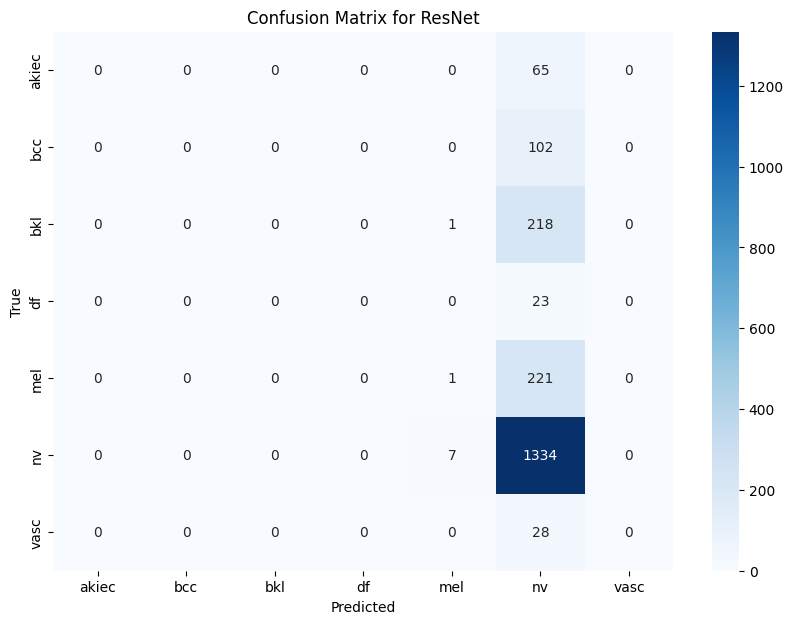

ROC-AUC for ResNet: 0.5075856995002003
EfficientNet-B0 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.6776 - loss: 1.1301
EfficientNet-B0 accuracy: 0.6704999804496765
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 629ms/step
Classification Report for EfficientNet-B0:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00       222
           5       0.67      1.00      0.80      1341
           6       0.00      0.00      0.00        28

    accuracy                           0.67      2000
   macro avg       0.10      0.14      0.11      2000
weighted avg       0.45      0.67      0.54      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


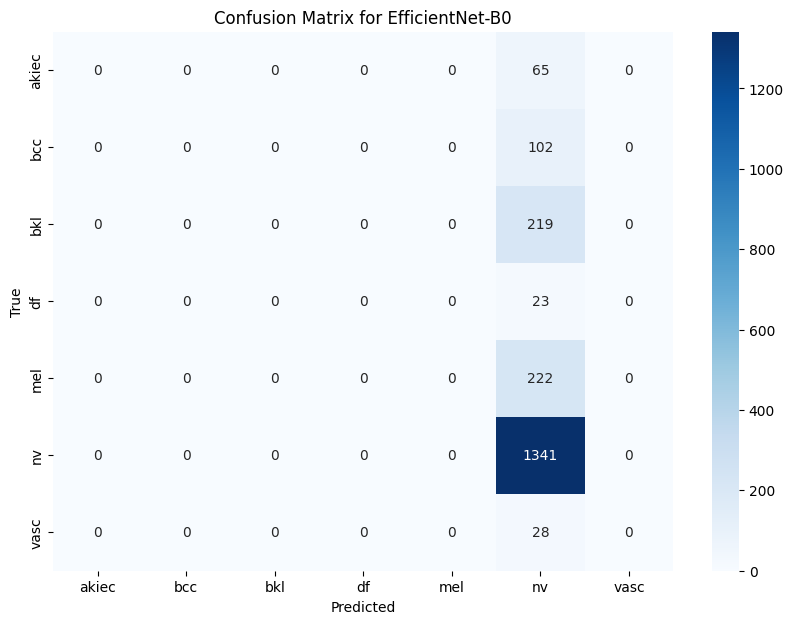

ROC-AUC for EfficientNet-B0: 0.4934179360609586
MobileNetV2 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 515ms/step - accuracy: 0.7532 - loss: 0.6720
MobileNetV2 accuracy: 0.7684999704360962
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step
Classification Report for MobileNetV2:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.01      0.01      0.01       102
           2       0.08      0.06      0.07       219
           3       0.00      0.00      0.00        23
           4       0.08      0.05      0.06       222
           5       0.67      0.78      0.72      1341
           6       0.00      0.00      0.00        28

    accuracy                           0.53      2000
   macro avg       0.12      0.13      0.12      2000
weighted avg       0.47      0.53      0.50      2000



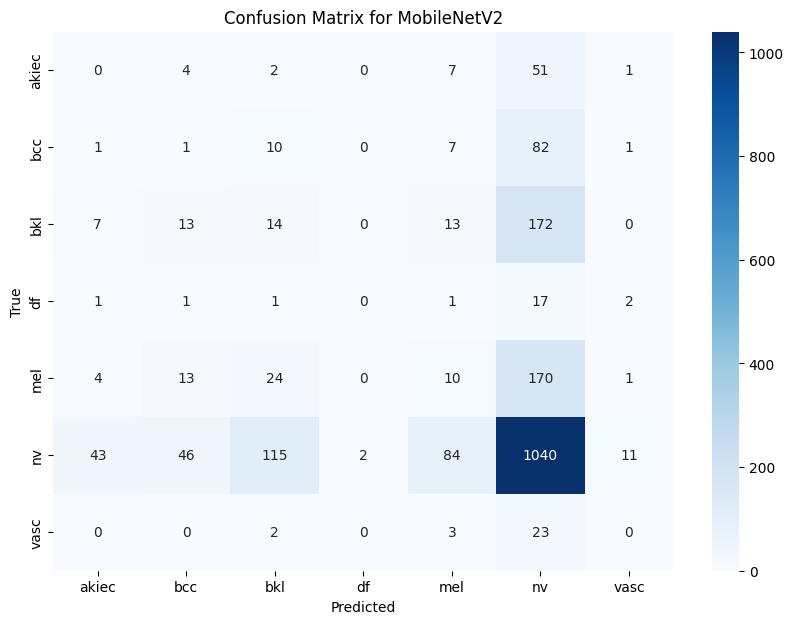

ROC-AUC for MobileNetV2: 0.5114486065892822
VGG16 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 622ms/step - accuracy: 0.6857 - loss: 0.8392
VGG16 accuracy: 0.7039999961853027
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 640ms/step
Classification Report for VGG16:
               precision    recall  f1-score   support

           0       0.08      0.02      0.03        65
           1       0.07      0.03      0.04       102
           2       0.00      0.00      0.00       219
           3       0.00      0.00      0.00        23
           4       0.09      0.14      0.11       222
           5       0.66      0.79      0.72      1341
           6       0.00      0.00      0.00        28

    accuracy                           0.54      2000
   macro avg       0.13      0.14      0.13      2000
weighted avg       0.46      0.54      0.50      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


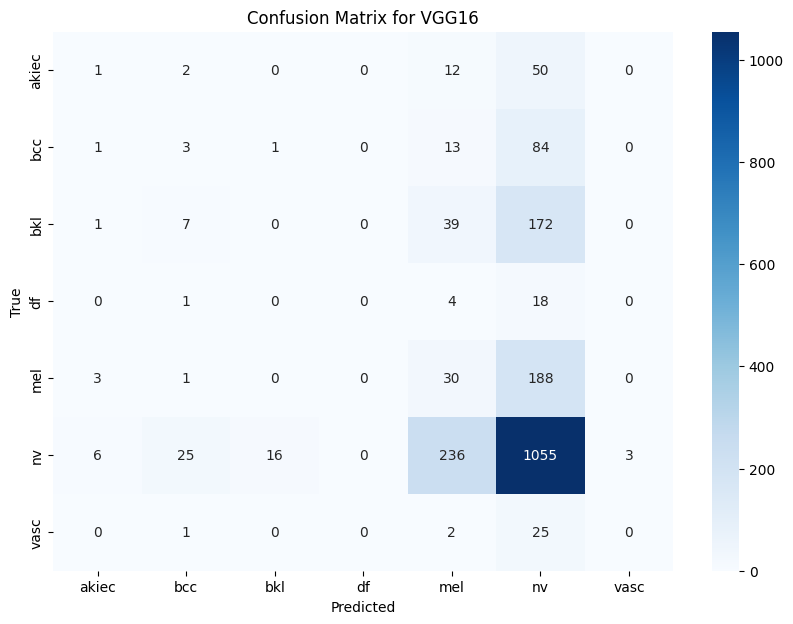

ROC-AUC for VGG16: 0.5055903178426735


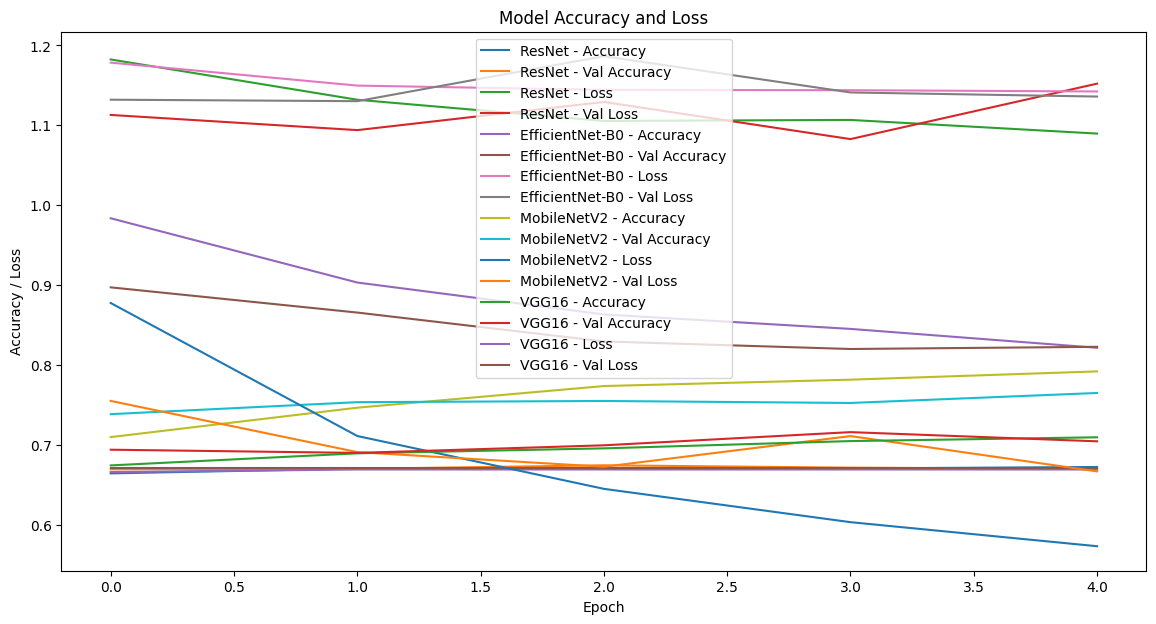

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV2, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import shutil

base_path = "/content/HAM10000/archive"
img_folder_1 = os.path.join(base_path, "HAM10000_images_part_1")
img_folder_2 = os.path.join(base_path, "HAM10000_images_part_2")
metadata_path = os.path.join(base_path, "HAM10000_metadata.csv")

df = pd.read_csv(metadata_path)

# Создаём общую папку для всех изображений
img_dir = "/content/all_images"
os.makedirs(img_dir, exist_ok=True)

# Скопируем изображения из двух папок в одну
for folder in [img_folder_1, img_folder_2]:
    for img_name in os.listdir(folder):
        src = os.path.join(folder, img_name)
        dst = os.path.join(img_dir, img_name)
        shutil.copy(src, dst)

# Чекаем
print("Общее количество изображений:", len(os.listdir(img_dir)))

# Добавляем полный путь к изображениям в датафрейм
df["image_path"] = df["image_id"].apply(lambda x: os.path.join(img_dir, x + ".jpg"))

# Снова чекаем
df = df[df["image_path"].apply(os.path.exists)]

# Создаём поддиректории по классам
train_dir = "/content/train_data"
os.makedirs(train_dir, exist_ok=True)

for label in df["dx"].unique():
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)

# Распределяем изображения по папкам классов
for _, row in df.iterrows():
    src = row["image_path"]
    dst = os.path.join(train_dir, row["dx"], os.path.basename(src))
    shutil.copy(src, dst)

print("Файлы распределены по классам.")

# Генератор данных
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # Многоклассовая классификация
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation"
)

# Количество классов
num_classes = len(df["dx"].unique())

# Функция для создания модели
def build_model(base_model):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(224, 224, 3)) # Создём входной тензор
    x = base_model(inputs, training=False) # Передаём входные данные в base_model
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.models import load_model

if os.path.exists('resnet_skin_model.h5'):
    print("ResNet модель уже обучена. Загружаем из файла...")
    resnet_model = load_model('resnet_skin_model.h5')
    resnet_history = None
else:
    print("Training ResNet model...")
    resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    resnet_model = build_model(resnet_base)
    resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=5)
    resnet_model.save('resnet_skin_model.h5')

if os.path.exists('efficientnet_skin_model.h5'):
    print("EfficientNet модель уже обучена. Загружаем из файла...")
    efficientnet_model = load_model('efficientnet_skin_model.h5')
    efficientnet_history = None
else:
    print("Training EfficientNet-B0 model...")
    efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    efficientnet_model = build_model(efficientnet_base)
    efficientnet_history = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=5)
    efficientnet_model.save('efficientnet_skin_model.h5')


# Обучение ResNet
print("Training ResNet model...")
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = build_model(resnet_base)
resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=5)
resnet_model.save('resnet_skin_model.h5')

# Обучение EfficientNet-B0
print("Training EfficientNet-B0 model...")
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_model = build_model(efficientnet_base)
efficientnet_history = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=5)
efficientnet_model.save('efficientnet_skin_model.h5')

# Обучение MobileNetV2
print("Training MobileNetV2 model...")
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenetv2_model = build_model(mobilenetv2_base)
mobilenetv2_history = mobilenetv2_model.fit(train_generator, validation_data=val_generator, epochs=5)
mobilenetv2_model.save('mobilenetv2_skin_model.h5')

# Обучение VGG16
print("Training VGG16 model...")
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model = build_model(vgg16_base)
vgg16_history = vgg16_model.fit(train_generator, validation_data=val_generator, epochs=5)
vgg16_model.save('vgg16_skin_model.h5')

# Оцениваем качество
def evaluate_and_print_metrics(model, history, model_name):
    print(f"{model_name} model evaluation:")
    score = model.evaluate(val_generator)
    print(f"{model_name} accuracy: {score[1]}")

    # Прогнозирование на валидационном наборе
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_generator.classes

    # Метрики
    report = classification_report(y_true, y_pred_classes)
    print(f"Classification Report for {model_name}:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC
    auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    print(f"ROC-AUC for {model_name}: {auc}")

evaluate_and_print_metrics(resnet_model, resnet_history, "ResNet")
evaluate_and_print_metrics(efficientnet_model, efficientnet_history, "EfficientNet-B0")
evaluate_and_print_metrics(mobilenetv2_model, mobilenetv2_history, "MobileNetV2")
evaluate_and_print_metrics(vgg16_model, vgg16_history, "VGG16")

# строим графики
def plot_metrics(histories):
    plt.figure(figsize=(14, 7))

    for model_name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} - Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} - Val Accuracy')
        plt.plot(history.history['loss'], label=f'{model_name} - Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} - Val Loss')

    plt.title('Model Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

histories = {
    "ResNet": resnet_history,
    "EfficientNet-B0": efficientnet_history,
    "MobileNetV2": mobilenetv2_history,
    "VGG16": vgg16_history
}

plot_metrics(histories)

# Визуализируем случайные изображения и их предсказания
def plot_random_images_with_predictions(generator, model, num_images=10):
    image_paths = [os.path.join(generator.directory, f) for f in os.listdir(generator.directory) if f.endswith('.jpg') or f.endswith('.png')]
    random


Сделаем график более читабельным. Построим отдельно для каждой модели Accuracy + Val Accuracy, чтобы проверить есть ли переобучение. И сразу для четырёх моделей Val Accuracy

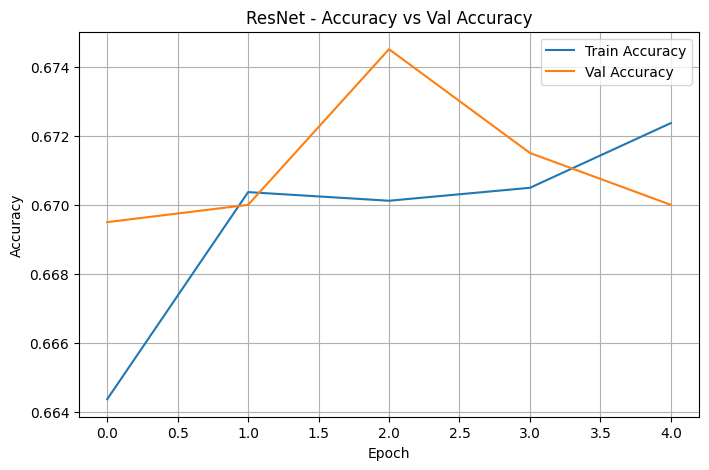

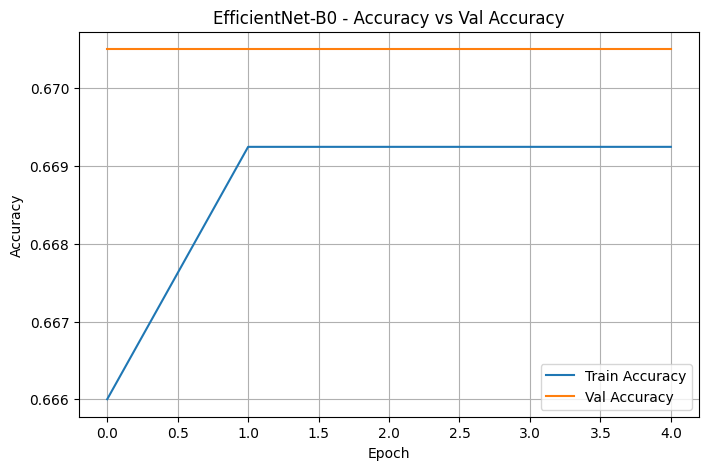

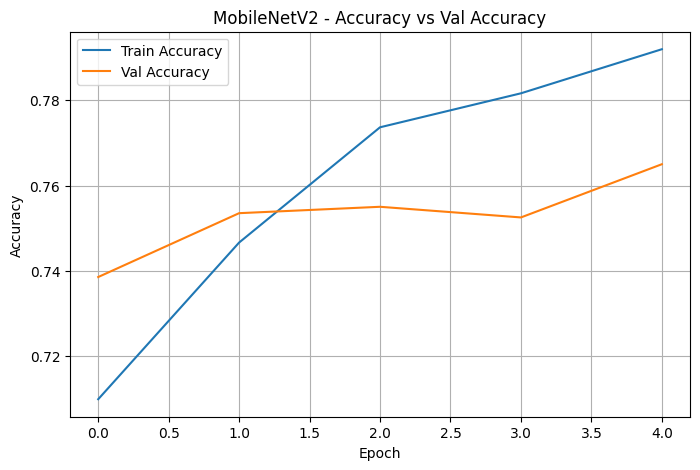

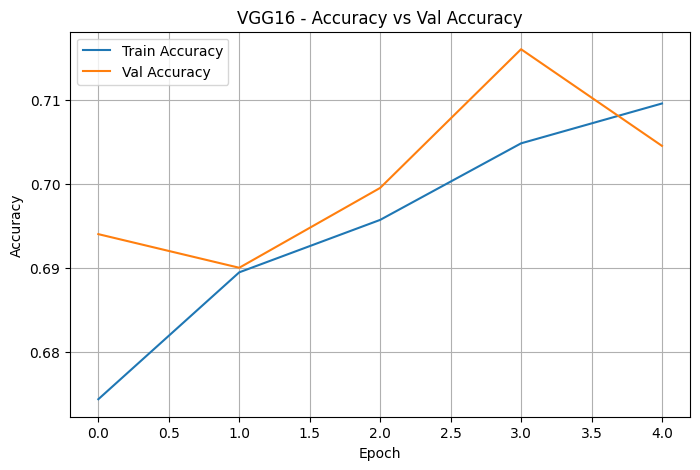

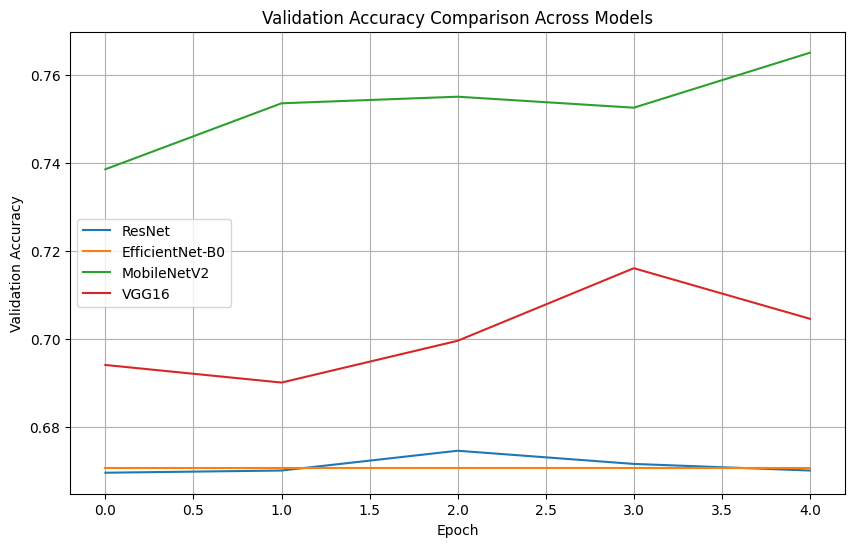

In [10]:
# Accuracy + Val Accuracy по отдельности для каждой модели
def plot_individual_model_accuracy(histories):
    for model_name, history in histories.items():
        if history is None:
            continue # если модель была загружена, а не обучалась, history = None
        plt.figure(figsize=(8, 5))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{model_name} - Accuracy vs Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

# Один график со всеми val_accuracy
def plot_all_val_accuracies(histories):
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        if history is not None:
            plt.plot(history.history['val_accuracy'], label=f'{model_name}')
    plt.title('Validation Accuracy Comparison Across Models')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_individual_model_accuracy(histories)
plot_all_val_accuracies(histories)
